Load Ranger data generated by Beamworks Strata:

In [1]:
# import the ranger class
from ranger_data import *

# load ranger data
r = ranger()
r.load_data('.\data')


Loading 00000015.bmp: 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]


Range Shifter and Buildup WETs can be specified when loading data:

In [2]:
# load ranger data with predfined range shifter and buildup WETs
r2 = ranger()
r2.load_data('.\data', RS='RS 5cm', buildup='PTFE 13.27')

Loading 00000015.bmp: 100%|██████████| 14/14 [00:00<00:00, 55.06it/s]


Check the beam orientation is correct in the ranger images. **The beam must travel up from the bottom of the image**:

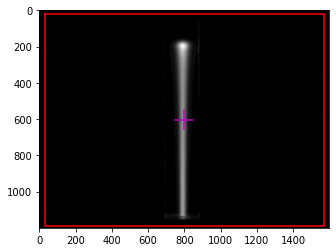

Beam image orientation: BOTTOM
1189.0
17.0
33.0
1536.0
799.6364
601.8524
3.609
3.614


In [2]:
# display the first image (indexed from 0 to n-1)
r.plot_img(0)

# check loaded image sequence's orientation
r.check_orientation()
print("Beam image orientation: "+r.orientation)


Plot the first image's IDD:

All IDDs displayed in raw format


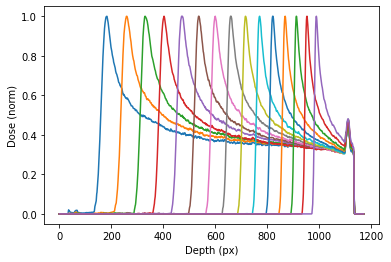

IDDs with legend


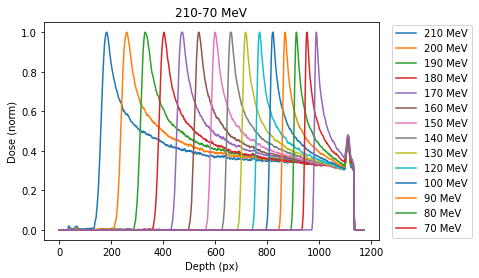

Single IDD referenced as an index from 0 to n


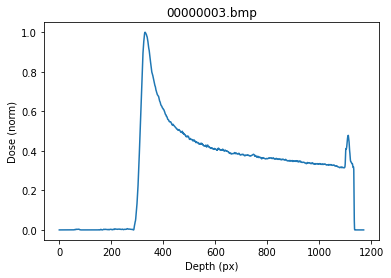

x-axis reversed


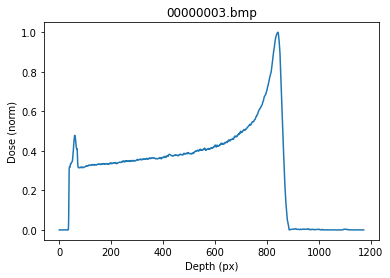

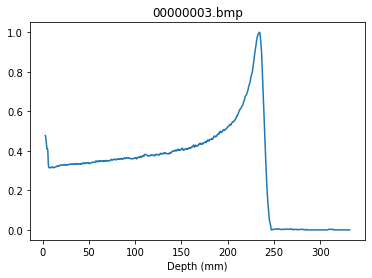

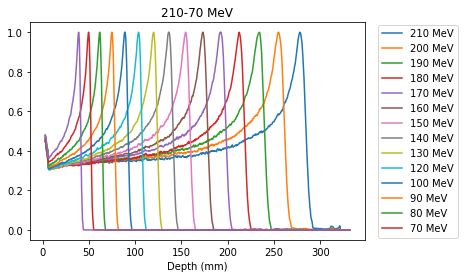

In [5]:
# display IDDs
print('All IDDs displayed in raw format')
r.plot_idd(axis=0) # all IDDs displayed in raw format
print('IDDs with legend')
r.plot_idd(axis=0,E=[210,200,190,180,170,160,150,140,130,120,100,90,80,70]) # IDDs with legend
print('Single IDD referenced as an index from 0 to n')
r.plot_idd(2, axis=0) # single IDD referenced as an index from 0 to n
print('x-axis reversed')
r.plot_idd(2, axis=-1) # x-axis reversed
print('x-axis in mm')
r.plot_idd(2,units='mm')
r.plot_idd(units='mm',E=[210,200,190,180,170,160,150,140,130,120,100,90,80,70])

List IDD metrics calculated from the .bmp images (in mm):

In [5]:
print('### Ranger D80 measurements (mm) ###')
for i in r.metrics_mm['D80']:
    print(i)

### Ranger D80 measurements (mm) ###
282.25466400973824
259.2085804530292
237.63512563487683
216.05671329059192
195.9513717167849
176.43236128831222
157.49959763120782
139.44891868037908
122.57651035897968
105.99431587426326
91.18317444277993
76.95863678624278
63.61693792319297
51.45480568388996
40.47270698703612


Compare Ranger D80s IDDs to reference data:

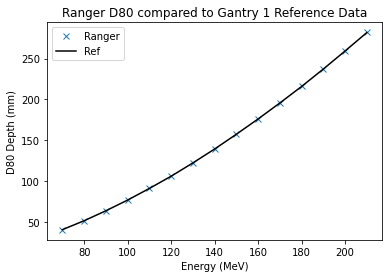

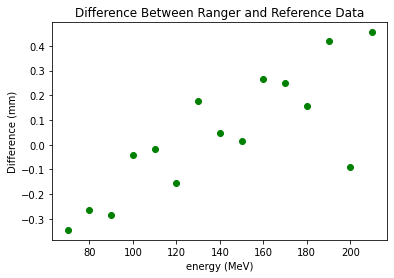

In [6]:
energies = r.reference_data['Energy'][-15:] # IDD energies
reference_d80 = r.reference_data['D80']['G1'][-15:] # reference data
ranger_d80 = r.metrics_mm['D80'] # ranger data
diff_d80 = np.array(ranger_d80) - np.array(reference_d80) # difference between ranger and reference

# plot D80s
plt.plot(energies,ranger_d80,'x')
plt.plot(energies,reference_d80,'k-')
plt.xlabel('Energy (MeV)')
plt.ylabel('D80 Depth (mm)')
plt.title('Ranger D80 compared to Gantry 1 Reference Data')
plt.legend(['Ranger', 'Ref'])
plt.show()

# plot differences
plt.plot(energies,diff_d80,'go')
plt.xlabel('energy (MeV)')
plt.ylabel('Difference (mm)')
plt.title('Difference Between Ranger and Reference Data')
plt.show()

Use the complicated alternative Ranger px to mm conversion:

In [ ]:

r3 = ranger('data', simple_cal=False)
r3.load_data()

# plot differences
energies = r3.reference_data['Energy'][-15:] # IDD energies
reference_d80 = r3.reference_data['D80']['G1'][-15:] # reference data
ranger_d80 = r3.metrics_mm['D80'] # ranger data
diff_d80_new = np.array(ranger_d80) - np.array(reference_d80) # difference between ranger and reference
plt.plot(energies,diff_d80,'go')
plt.plot(energies,diff_d80_new,'o')
plt.xlabel('energy (MeV)')
plt.ylabel('Difference (mm)')
plt.title('Difference Between Ranger and Reference Data')
plt.legend(['simple cal','fancy cal'])
plt.show()

Recalibrate Ranger's pixel to mm conversion using the `ranger.calibrate` function data in the `ranger.calibration` dictionary:

In [ ]:
# recalibrate Ranger px to mm conversion using parameters in the ranger.calibration dict
calib_params = r.calibrate()
print("Internal calibration performed successfully?: "+str(calib_params['results']['success']))
calib_params.pop('results')
print(calib_params)


Update the calibration using a user-supplied dictionary:

In [ ]:
cal_dict = {
            'pixel_pitch': 8,
            'scintillator_WER': 0.5,
            'window_WER': 1.4,
            'window_thickness': 10,   # window thickness in pixels
            'pixel_offset': 3.6,
            'buildup': 0,
            'RS': 0,
            'CalD80':[      282.1,
                            259.5,
                            237.5,
                            216.2,
                            196.0,
                            176.5,
                            157.8,
                            139.9,
                            122.7,
                            106.5,
                            91.5,
                            77.4,
                            64.0,
                            51.7,
                            41.0],
            'RangerD80':[   944,
                            866,
                            793,
                            721,
                            653,
                            585,
                            522,
                            463,
                            404,
                            349,
                            300,
                            252,
                            207,
                            166,
                            127],
            }
calib_params2 = r.calibrate(cal_dict)
print("External calibration performed successfully?: "+str(calib_params2['results']['success']))
calib_params2.pop('results')
print(calib_params2)

# load a new ranger object with the update calibration parameters
r5 = ranger('data',cal_data=calib_params2, simple_cal=False)
r5.load_data()
energies = r5.reference_data['Energy'][-15:] # IDD energies
reference_d80 = r5.reference_data['D80']['G1'][-15:] # reference data
ranger_d80 = r5.metrics_mm['D80'] # ranger data
diff_d80 = np.array(ranger_d80) - np.array(reference_d80) # difference between ranger and reference

# plot D80s
plt.plot(energies,ranger_d80,'x')
plt.plot(energies,reference_d80,'k-')
plt.xlabel('Energy (MeV)')
plt.ylabel('D80 Depth (mm)')
plt.title('Ranger D80 compared to Gantry 1 Reference Data')
plt.legend(['Ranger', 'Ref'])
plt.show()

print(diff_d80)